# 백준 2638(https://www.acmicpc.net/problem/2638)

N×M의 모눈종이 위에 아주 얇은 치즈가 <그림 1>과 같이 표시되어 있다. 단, N 은 세로 격자의 수이고, M 은 가로 격자의 수이다. 이 치즈는 냉동 보관을 해야만 하는데 실내온도에 내어놓으면 공기와 접촉하여 천천히 녹는다. 그런데 이러한 모눈종이 모양의 치즈에서 각 치즈 격자(작 은 정사각형 모양)의 4변 중에서 적어도 2변 이상이 실내온도의 공기와 접촉한 것은 정확히 한시간만에 녹아 없어져 버린다. 따라서 아래 <그림 1> 모양과 같은 치즈(회색으로 표시된 부분)라면 C로 표시된 모든 치즈 격자는 한 시간 후에 사라진다.
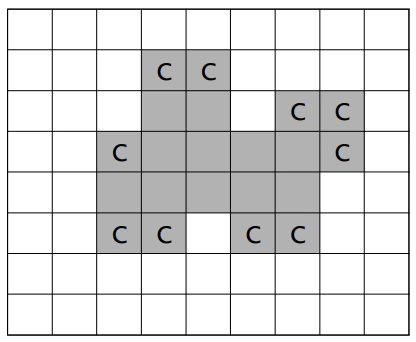
<그림 2>와 같이 치즈 내부에 있는 공간은 치즈 외부 공기와 접촉하지 않는 것으로 가정한다. 그러므 로 이 공간에 접촉한 치즈 격자는 녹지 않고 C로 표시된 치즈 격자만 사라진다. 그러나 한 시간 후, 이 공간으로 외부공기가 유입되면 <그림 3>에서와 같이 C로 표시된 치즈 격자들이 사라지게 된다.
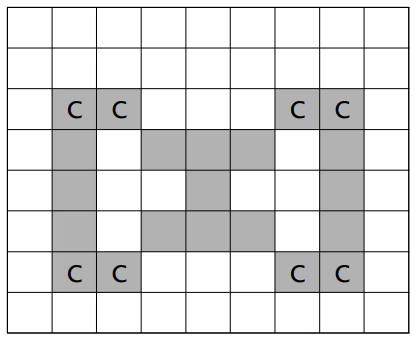
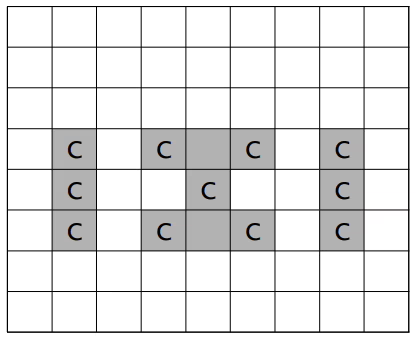
모눈종이의 맨 가장자리에는 치즈가 놓이지 않는 것으로 가정한다. 입력으로 주어진 치즈가 모두 녹아 없어지는데 걸리는 정확한 시간을 구하는 프로그램을 작성하시오.

> 입력: 첫째 줄에는 모눈종이의 크기를 나타내는 두 개의 정수 N, M (5 ≤ N, M ≤ 100)이 주어진다. 그 다음 N개의 줄에는 모눈종이 위의 격자에 치즈가 있는 부분은 1로 표시되고, 치즈가 없는 부분은 0으로 표시된다. 또한, 각 0과 1은 하나의 공백으로 분리되어 있다.

> 출력: 출력으로는 주어진 치즈가 모두 녹아 없어지는데 걸리는 정확한 시간을 정수로 첫 줄에 출력한다.

## 1. Python solution1

In [16]:
import sys
input = sys.stdin.readline
from collections import deque

N, M = map(int, input().split(' '))
graph = [list(map(int, input().split(' '))) for _ in range(N)]

# 상하좌우
dx = [-1, 1, 0, 0]
dy = [0, 0, -1, 1]

def start():
    visit = [[False] * M for _ in range(N)]
    visit[0][0] = True
    queue = deque([(0, 0)])
    while queue:
        x, y = queue.popleft()
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            
            # 이동 불가
            if (nx < 0) or (nx >= N) or (ny < 0) or (ny >= M):
                continue
            
            # 처음 방문하고
            if not visit[nx][ny]:
                # 치즈라면
                if graph[nx][ny] >= 1:
                    graph[nx][ny] += 1
                else:
                    queue.append((nx, ny))
                    visit[nx][ny] = True
                    
def melt():
    finish = True
    for i in range(N):
        for j in range(M):
            if graph[i][j] >= 3:
                graph[i][j] = 0
                finish = False
            elif graph[i][j] == 2:
                graph[i][j] = 1
    return finish

result = 0
while True:
    start()
    if melt():
        print(result)
        break
    else:
        result += 1

8 9
0 0 0 0 0 0 0 0 0
0 0 0 1 1 0 0 0 0
0 0 0 1 1 0 1 1 0
0 0 1 1 1 1 1 1 0
0 0 1 1 1 1 1 0 0
0 0 1 1 0 1 1 0 0
0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0
4


## 1. Python solution2

In [21]:
import sys
input = sys.stdin.readline
from collections import deque

N, M = map(int, input().split(' '))
graph = [list(map(int, input().split(' '))) for _ in range(N)]

# 상하좌우
dx = [-1, 1, 0, 0]
dy = [0, 0, -1, 1]


def bfs():
    q = deque([(0, 0)])
    visited[0][0] = 1
    while q:
        x, y = q.popleft()
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            
            if (0 <= nx < N) and (0 <= ny < M) and (visited[nx][ny] == 0):
                if graph[nx][ny] >= 1:
                    graph[nx][ny] += 1
                else:
                    visited[nx][ny] = 1
                    q.append((nx,ny))

time = 0
while True:
    visited = [[0] * M for _ in range(N)]
    bfs()
    flag = 0
    for i in range(N):
        for j in range(M):
            if graph[i][j] >= 3:
                graph[i][j] = 0
                flag = 1
            elif graph[i][j] == 2:
                graph[i][j] = 1
    if flag == 1:
        time += 1
    else:
        break

print(time)

8 9
0 0 0 0 0 0 0 0 0
0 0 0 1 1 0 0 0 0
0 0 0 1 1 0 1 1 0
0 0 1 1 1 1 1 1 0
0 0 1 1 1 1 1 0 0
0 0 1 1 0 1 1 0 0
0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0
4
